## Observations and Insights 

The mice with the highest weight correlated quite highly with average tumor size. It is reasonable to conclude with a strong r-value correlation (0.83) from the linear regression.

The two top drugs from this trial are both Capomulin and Ramicane. All the other drugs had very similar results to the placebo as shown in summary statistics.

The study had an almost completely even gender split (Female:49.4%, Male 50.6%) which shows a fair sample size for equal effectiveness amongst the genders.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')
# Display the data table for preview
data_df.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [2]:
# Checking the number of mice.
summary_mice = len(pd.unique(data_df['Mouse ID']))
summary_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupl_mice_ids = data_df.loc[data_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
dupl_mice_ids

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data_df = data_df[data_df['Mouse ID'].isin(dupl_mice_ids)==False]
clean_data_df.head(10)



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [6]:
# Checking the number of mice in the clean DataFrame.
summary_mice_clean = len(pd.unique(clean_data_df['Mouse ID']))
summary_mice_clean

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

# mean
mean = clean_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg('mean')
#median
median = clean_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg('median')
#variance
variance = clean_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg('var')
#standard deviation
std_dev = clean_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg('std')
#SEM of the tumor volume
std_error_mean = clean_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg('sem')
# Assemble the resulting series into a single summary dataframe.
summary = pd.DataFrame({"Mean Tumor V":mean,"Median Tumor V":median,"Tumor V Var":variance,"Tumor V Std Dev.":std_dev,"Tumor V Std. Err.":std_error_mean})
summary


,Mean Tumor V,Median Tumor V,Tumor V Var,Tumor V Std Dev.,Tumor V Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary = clean_data_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
summary

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

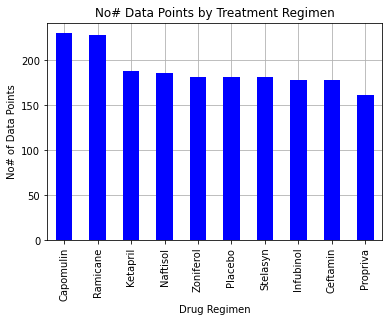

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

## Generate bar chart (.plot.bar()) based on (.value_counts()) for each treatment regimen 'Drug Regimen'
bar_plot = data_df['Drug Regimen'].value_counts().plot.bar(width=0.5,color="b", zorder=3)

## Set Title and X/Y Labels
bar_plot.set_title('No# Data Points by Treatment Regimen')
bar_plot.set_ylabel("No# of Data Points")
bar_plot.set_xlabel("Drug Regimen")

## underlay grid on plot for easier readability and reference
bar_plot.grid(zorder=0)

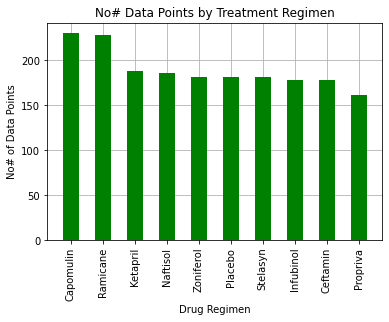

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

# Calculate the amount of data points for each drug regimen
drug_reg_counts = data_df['Drug Regimen'].value_counts()

# Set the x_axis to the length of the 'counts' series
x_axis = np.arange(len(drug_reg_counts))

## Create bar plot with drug regimen counts as series
## as the amount of values on the x axis, and the corresponding values
## in the series as the y values
plt.bar(x_axis, drug_reg_counts,color="g",width = 0.5, zorder=3)

## Label the tick marks according to the index values in the 'counts' series
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drug_reg_counts.index.values)

## Rotate tick marks 90 degrees for for easier readability and reference
plt.xticks(rotation=90)

## Set Title and X/Y Labels
plt.title('No# Data Points by Treatment Regimen')
plt.ylabel("No# of Data Points")
plt.xlabel("Drug Regimen")

## underlay grid on plot for easier readability and reference
plt.grid(zorder=0)

## Display plot
plt.show()

Text(0, 0.5, '')

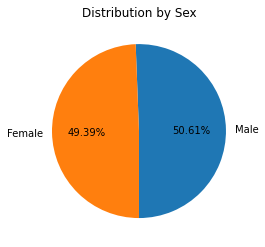

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

## Identify distribution of data by sex
sex_dist_count = data_df['Sex'].value_counts()

## Plot a pie chart filled with corresponding percentages and displayed vertically
pie_plot = sex_dist_count.plot.pie(autopct="%.2f%%", startangle=270, title='Distribution by Sex')

## Hide the 'y' label
pie_plot.set_ylabel('')

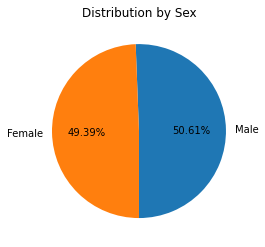

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Identify distribution of data by sex
sex_dist_count = data_df['Sex'].value_counts()

# Tell matplotlib to create a pie chart filled with corresponding percentages and displayed vertically
plt.pie(sex_dist_count, labels=sex_dist_count.index.values, autopct="%.2f%%", startangle=270)
plt.title('Distribution by Sex')

# Display resulting plot
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint_df = pd.DataFrame(data_df.groupby('Mouse ID')['Timepoint'].agg('max'))
last_timepoint_df.rename(columns={'Timepoint': 'max_timepoint'},inplace = True)
last_timepoint_df


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

merged_timepoint_df = pd.merge(data_df, last_timepoint_df, on='Mouse ID')
merged_timepoint_df.head(10)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,max_timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45
5,k403,Ramicane,Male,21,16,25,33.464577,1,45
6,k403,Ramicane,Male,21,16,30,31.099498,1,45
7,k403,Ramicane,Male,21,16,35,26.546993,1,45
8,k403,Ramicane,Male,21,16,40,24.365505,1,45
9,k403,Ramicane,Male,21,16,45,22.050126,1,45


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

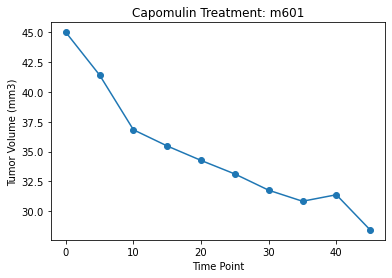

In [14]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

## Establish data points of mice treated with Capomulin
capo_mice = data_df.loc[data_df['Drug Regimen'] == 'Capomulin']
capo_mouse = data_df.loc[data_df['Mouse ID'] == 'm601']
## Plot a line chart with the time values on the x-axis and the tumor volume values on the y-axis
plt.plot(capo_mouse['Timepoint'], capo_mouse['Tumor Volume (mm3)'], marker = 'o')

# Add labels and title to plot
plt.title("Capomulin Treatment: m601")
plt.xlabel("Time Point")
plt.ylabel("Tumor Volume (mm3)")


# Display plot
plt.show()


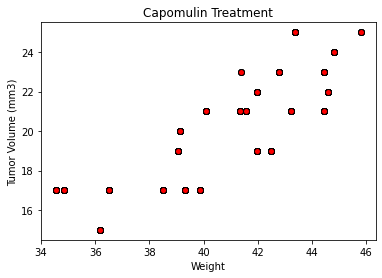

In [15]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

## Filter results for 'Capomulin' regimen
capo_df = data_df.loc[data_df['Drug Regimen'] == 'Capomulin']

## Get average tumor volume for each mouse, rename column to avg tumor vol
avg_vol_df1 = pd.DataFrame(capo_df.groupby('Mouse ID')['Tumor Volume (mm3)'].agg('mean'))
avg_vol_df1.rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'},inplace = True)

## Merge tumor volume to data_df
avg_vol_df = pd.merge(capo_df, avg_vol_df1, on='Mouse ID')

## Establish XY variables for scatter plot
mean_tumor_volume = avg_vol_df['avg_tumor_vol']
mouse_weight = avg_vol_df['Weight (g)']

## Display scatter plot
plt.scatter(mean_tumor_volume, mouse_weight, marker="o", facecolors="red", edgecolors="black")

# Add labels and title to plot
plt.title("Capomulin Treatment")
plt.xlabel("Weight")
plt.ylabel("Tumor Volume (mm3)")

# Display plot
plt.show()

## Correlation and Regression

The correlation between both factors is 0.83
The r-squared is: 0.6962164535925288
The r-value is: 0.8343958614425941


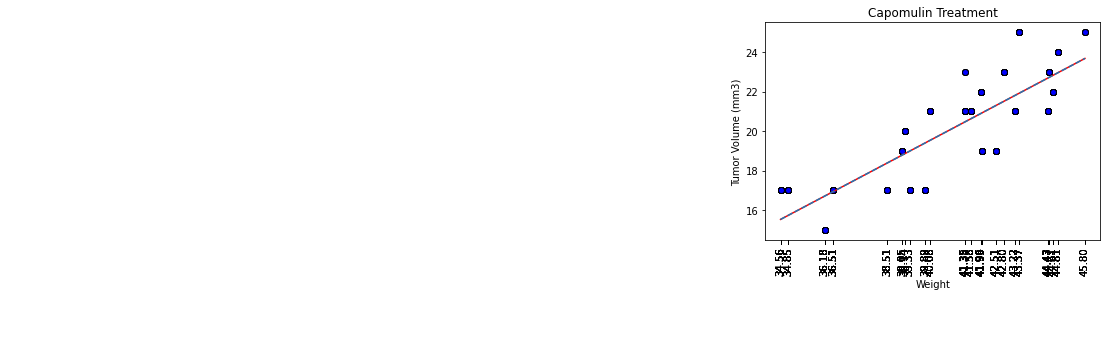

In [27]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

## Filter results for 'Capomulin' regimen
capo_df = data_df.loc[data_df['Drug Regimen'] == 'Capomulin']
#capo_df = data_df.loc[data_df['Drug Regimen'] == 'Ramicane']

## Get average tumor volume for each mouse, rename column to avg tumor vol
avg_vol_df1 = pd.DataFrame(capo_df.groupby('Mouse ID')['Tumor Volume (mm3)'].agg('mean'))
avg_vol_df1.rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'},inplace = True)

## Merge tumor volume to data_df
avg_vol_df = pd.merge(capo_df, avg_vol_df1, on='Mouse ID')

## Establish XY variables for scatter plot
mean_tumor_volume = avg_vol_df['avg_tumor_vol']
mouse_weight = avg_vol_df['Weight (g)']

## Calculate the correlation coefficient
correlation = st.pearsonr(mean_tumor_volume,mouse_weight)
print(f"The correlation between both factors is {round(correlation[0],2)}")


## Perform a linear regression on Mean Tumor Volume versus Mouse Weight
mw_slope, mw_int, mw_r, mw_p,mw_std_err = st.linregress(mean_tumor_volume, mouse_weight)
regress_values = mean_tumor_volume * mw_slope + mw_int
mw_fit = mw_slope * mean_tumor_volume + mw_int
## Plot the linear model on top of scatter plot 

line_eq = "y = " + str(round(mw_slope,2)) + "x + " + str(round(mw_int,2))
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.scatter(mean_tumor_volume, mouse_weight, marker="o", facecolors="blue", edgecolors="black")
plt.plot(mean_tumor_volume,regress_values,"r-")
plt.xticks(mean_tumor_volume, rotation=90)
plt.plot(mean_tumor_volume,mw_fit,"--")
plt.title("Capomulin Treatment")
plt.xlabel("Weight")
plt.ylabel("Tumor Volume (mm3)")
print(f"The r-squared is: {mw_r**2}")
print(f"The r-value is: {mw_r}")
plt.show()
